In [1]:
from os import walk
from os.path import join

import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from bs4 import BeautifulSoup
%matplotlib inline

In [2]:
ex = 'SpamData/01_Processing/practice_email.txt'
Spam1_path = 'SpamData/01_Processing/spam_assassin_corpus/spam_1'
Spam2_path = 'SpamData/01_Processing/spam_assassin_corpus/spam_2'
Easyham1_path = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_1'
Easyham2_path = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_2'
spamcat = 1
hamcat = 0
DATA_JSON_FILE = 'SpamData/01_Processing/bayes.json'

In [3]:
stream = open(ex, encoding= 'latin-1')
message = stream.read()
stream.close()

print(type(message))
print(message)

<class 'str'>
From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002
Return-Path: <exmh-workers-admin@spamassassin.taint.org>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36
	for <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)
Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for
    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100
Received: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by
    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002
    07:35:02 -0400 (EDT)
Delivered-To: exmh-workers@listman.spamassassin.taint.org
Received: fro

In [4]:
stream = open(ex, encoding= 'latin-1')
isbody = False
lines = []
for line in stream:

    if isbody:
        lines.append(line)

    elif line == '\n':
        isbody = True
stream.close()        
emailbody = '\n'.join(lines)
print(emailbody)



Dear Mr Still



Good tidings to you and all your staff for the festive season ahead (Christmas).

Now to the crux of the matter-in-hand: I am a fully qualified Santa Claus and am wondering whether you might consider me to run my own "Santa's Grotto" in your store.

But WAIT! You're probably thinking: "What makes him so special?"

Well, first of all, I have made several changes to the characterisation of Father Christmas. Rather than greeting the children with shouts of "Ho, ho, ho!" I prefer to whisper the phrase "Dependence is not unfathomable in this cruel world we live in". In addition, my gifts are ALL hand-made, ranging from felt hoops to vanilla-pod holders.

You will note also, from the enclosed sketch, that I have radically redesigned Santa's outfit and have renamed my character "Lord Buckles". Would you be interested in employing me? I promise NEVER to let you down.

I look forward to hearing from you.



Best wishes

Robin Cooper

[Excerpt from the book: The Timewaster Let

In [5]:
  for root, dirnames, filenames in walk(Spam1_path):
      print(root)
      filepath = join(root, filenames[1])
      print(filepath)

#root : Chỉ in ra các thư mục từ những gì bạn đã chỉ định.
#dirs : In ra các thư mục con từ thư mục gốc.
#files : In ra tất cả các file từ thư mục gốc và thư mục.

      

SpamData/01_Processing/spam_assassin_corpus/spam_1
SpamData/01_Processing/spam_assassin_corpus/spam_1\00002.d94f1b97e48ed3b553b3508d116e6a09


In [6]:
def emailgenerator(path):
  for root, dirnames, filenames in walk(path):
    for filename in filenames:

      filepath = join(root, filename)

      stream = open(filepath, encoding= 'latin-1')

      isbody = False

      lines = []

      for line in stream:

        if isbody:
          lines.append(line)

        elif line == '\n':
          isbody = True

      stream.close()

      emailbody = '\n'.join(lines)
      yield filename, emailbody


In [7]:
def dffromdirectory(path, classification):
  rows = []
  rownames = []

  for filename, emailbody in emailgenerator(path):

    rows.append({'MESSAGE' : emailbody, 'CATEGORY' : classification} )
    rownames.append(filename)

  return pd.DataFrame(rows, index = rownames)

In [8]:
spamemail =  dffromdirectory(Spam1_path, 1)
spamemail =  spamemail.append(dffromdirectory(Spam2_path, 1))
spamemail.shape

spamemail.head()


C:\Users\Admin\AppData\Local\Temp\ipykernel_8252\4230649018.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  spamemail =  spamemail.append(dffromdirectory(Spam2_path, 1))


,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1


In [95]:
nonspamemail =  dffromdirectory(Easyham1_path, 0)
nonspamemail =  nonspamemail.append(dffromdirectory(Easyham2_path, 0))
nonspamemail.shape
nonspamemail

C:\Users\Admin\AppData\Local\Temp\ipykernel_8252\231436548.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nonspamemail =  nonspamemail.append(dffromdirectory(Easyham2_path, 0))


,MESSAGE,CATEGORY
00001.7c53336b37003a9286aba55d2945844c,"Date: Wed, 21 Aug 2002 10:54:46 -05...",0
00002.9c4069e25e1ef370c078db7ee85ff9ac,"Martin A posted:\n\nTassos Papadopoulos, the G...",0
00003.860e3c3cee1b42ead714c5c874fe25f7,Man Threatens Explosion In Moscow \n\n\n\nThur...,0
00004.864220c5b6930b209cc287c361c99af1,Klez: The Virus That Won't Die\n\n \n\nAlready...,0
00005.bf27cdeaf0b8c4647ecd61b1d09da613,"> in adding cream to spaghetti carbonara, whi...",0
...,...,...
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0


In [10]:
data = pd.concat([spamemail, nonspamemail])
data

,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1
...,...,...
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0


In [11]:
data['MESSAGE'].isnull().values.any()

False

In [12]:
(data.MESSAGE.str.len() == 0).any()

True

In [13]:
(data.MESSAGE.str.len() == 0).sum()

3

In [14]:
type(data.MESSAGE.str.len() == 0)

pandas.core.series.Series

In [15]:
data[data.MESSAGE.str.len() == 0].index

Index(['cmds', 'cmds', 'cmds'], dtype='object')

In [16]:
data.index.get_loc('cmds')

array([False, False, False, ..., False, False, False])

In [17]:
data.drop(['cmds'], inplace = True )

In [18]:
data[data.MESSAGE.str.len() == 0].index

Index([], dtype='object')

In [19]:
data.shape

(5796, 2)

In [20]:
document_ids = range(0, len(data.index))
data['DOC_ID'] = document_ids

In [21]:
data.DOC_ID

00001.7848dde101aa985090474a91ec93fcf0       0
00002.d94f1b97e48ed3b553b3508d116e6a09       1
00003.2ee33bc6eacdb11f38d052c44819ba6c       2
00004.eac8de8d759b7e74154f142194282724       3
00005.57696a39d7d84318ce497886896bf90d       4
                                          ... 
01396.61983fbe6ec43f55fd44e30fce24ffa6    5791
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7    5792
01398.169b51731fe569f42169ae8f948ec676    5793
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896    5794
01400.f897f0931e461e7b2e964d28e927c35e    5795
Name: DOC_ID, Length: 5796, dtype: int64

In [22]:
data['FILE_NAME'] = data.index
data.set_index('DOC_ID', inplace = True)
data.head()

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00003.2ee33bc6eacdb11f38d052c44819ba6c
3,##############################################...,1,00004.eac8de8d759b7e74154f142194282724
4,I thought you might like these:\n\n1) Slim Dow...,1,00005.57696a39d7d84318ce497886896bf90d


In [23]:
data.to_json(DATA_JSON_FILE)

In [24]:
data.CATEGORY.value_counts()

0    3900
1    1896
Name: CATEGORY, dtype: int64

In [25]:
amount_of_spam = data.CATEGORY.value_counts()[1]
amount_of_ham = data.CATEGORY.value_counts()[0]


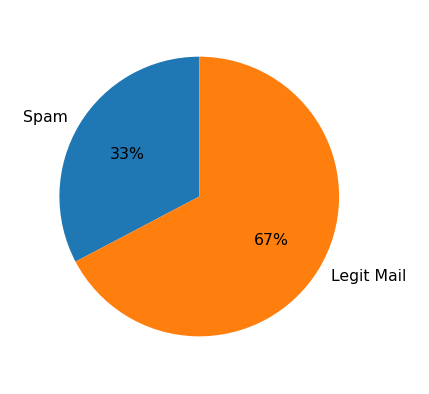

In [26]:
category_names = ['Spam', 'Legit Mail']
sizes = [amount_of_spam, amount_of_ham] 

plt.figure(figsize= (2,2), dpi= 227)
plt.pie(sizes, labels = category_names, textprops = {'fontsize' : 5}, startangle = 90,
       autopct = '%1.0f%%')
plt.show()

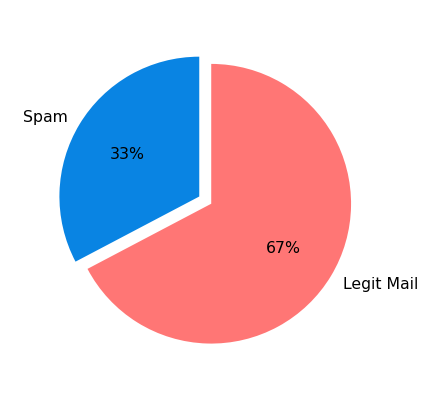

In [27]:
category_names = ['Spam', 'Legit Mail']
sizes = [amount_of_spam, amount_of_ham] 
custom_colors = ['#0984e3','#ff7675']

plt.figure(figsize= (2,2), dpi= 227)
plt.pie(sizes, labels = category_names, textprops = {'fontsize' : 5}, startangle = 90,
       autopct = '%1.0f%%', colors = custom_colors, explode= [0, 0.1])
plt.show()

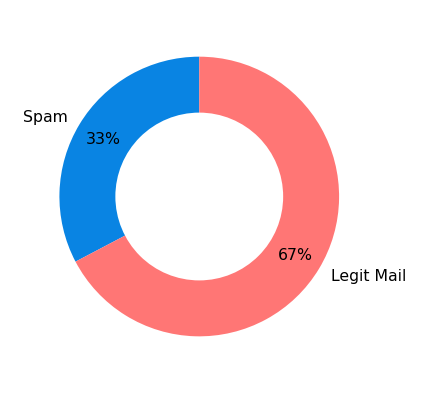

In [28]:
category_names = ['Spam', 'Legit Mail']
sizes = [amount_of_spam, amount_of_ham] 
custom_colors = ['#0984e3','#ff7675']

plt.figure(figsize= (2,2), dpi= 227)
plt.pie(sizes, labels = category_names, textprops = {'fontsize' : 5}, startangle = 90,
       autopct = '%1.0f%%', colors = custom_colors, pctdistance = 0.8)

centre_circle = plt.Circle((0, 0), radius = 0.6, fc = 'white')
plt.gca().add_artist(centre_circle)

plt.show()

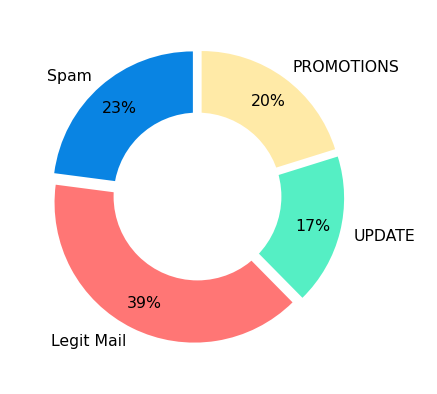

In [29]:
category_names = ['Spam', 'Legit Mail','UPDATE', 'PROMOTIONS']
sizes = [25, 43,19, 22] 
custom_colors = ['#0984e3', '#ff7675', '#55efc4', '#ffeaa7'] 
offset = [0.05, 0.05, 0.05, 0.05]

plt.figure(figsize= (2,2), dpi= 227)
plt.pie(sizes, labels = category_names, textprops = {'fontsize' : 5}, startangle = 90,
       autopct = '%1.0f%%', colors = custom_colors, pctdistance = 0.8, explode= offset)

centre_circle = plt.Circle((0, 0), radius = 0.6, fc = 'white')
plt.gca().add_artist(centre_circle)

plt.show()

In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
msg = 'Hello World'
word_tokenize(msg)

['Hello', 'World']

In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
stop_words = set(stopwords.words('english'))

In [34]:
type(stop_words)

set

In [35]:
msg = 'Hello World, to be or not to be.'
words = word_tokenize(msg.lower())

filtered_word = []

for word in words:
    if word not in stop_words:
        filtered_word.append(word)

print(filtered_word)

['hello', 'world', ',', '.']


In [36]:
msg = 'Hello World, to be or not to be. \
        Nobody expects the Spanish Inquisition!'
words = word_tokenize(msg.lower())

stemmer = SnowballStemmer('english')

filtered_word = []

for word in words:
    if word not in stop_words:
        stemmed_word = stemmer.stem(word)
        filtered_word.append(word)

print(filtered_word)

['hello', 'world', ',', '.', 'nobody', 'expects', 'spanish', 'inquisition', '!']


In [37]:
'p'.isalpha()

True

In [38]:
'?'.isalpha()

False

In [39]:
msg = 'Hello World, to be or not to be. \
        Nobody expects the Spanish Inquisition!'
words = word_tokenize(msg.lower())

stemmer = SnowballStemmer('english')

filtered_word = []

for word in words:
    if word not in stop_words and word.isalpha():
        stemmed_word = stemmer.stem(word)
        filtered_word.append(stemmed_word)

print(filtered_word)

['hello', 'world', 'nobodi', 'expect', 'spanish', 'inquisit']


In [40]:
soup = BeautifulSoup(data.at[1, 'MESSAGE'], 'html.parser')
print(soup.prettify())

1) Fight The Risk of Cancer!

http://www.adclick.ws/p.cfm?o=315&amp;s=pk007



2) Slim Down - Guaranteed to lose 10-12 lbs in 30 days

http://www.adclick.ws/p.cfm?o=249&amp;s=pk007



3) Get the Child Support You Deserve - Free Legal Advice

http://www.adclick.ws/p.cfm?o=245&amp;s=pk002



4) Join the Web's Fastest Growing Singles Community

http://www.adclick.ws/p.cfm?o=259&amp;s=pk007



5) Start Your Private Photo Album Online!

http://www.adclick.ws/p.cfm?o=283&amp;s=pk007



Have a Wonderful Day,

Offer Manager

PrizeMama



























If you wish to leave this list please use the link below.

http://www.qves.com/trim/?ilug@linux.ie%7C17%7C114258





-- 

Irish Linux Users' Group: ilug@linux.ie

http://www.linux.ie/mailman/listinfo/ilug for (un)subscription information.

List maintainer: listmaster@linux.ie



In [41]:
soup.get_text() #xóa html

"1) Fight The Risk of Cancer!\n\nhttp://www.adclick.ws/p.cfm?o=315&s=pk007\n\n\n\n2) Slim Down - Guaranteed to lose 10-12 lbs in 30 days\n\nhttp://www.adclick.ws/p.cfm?o=249&s=pk007\n\n\n\n3) Get the Child Support You Deserve - Free Legal Advice\n\nhttp://www.adclick.ws/p.cfm?o=245&s=pk002\n\n\n\n4) Join the Web's Fastest Growing Singles Community\n\nhttp://www.adclick.ws/p.cfm?o=259&s=pk007\n\n\n\n5) Start Your Private Photo Album Online!\n\nhttp://www.adclick.ws/p.cfm?o=283&s=pk007\n\n\n\nHave a Wonderful Day,\n\nOffer Manager\n\nPrizeMama\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nIf you wish to leave this list please use the link below.\n\nhttp://www.qves.com/trim/?ilug@linux.ie%7C17%7C114258\n\n\n\n\n\n-- \n\nIrish Linux Users' Group: ilug@linux.ie\n\nhttp://www.linux.ie/mailman/listinfo/ilug for (un)subscription information.\n\nList maintainer: listmaster@linux.ie\n\n\n"

In [42]:
def cleanmessage(message, stemmer = PorterStemmer(), stop_words = set(stopwords.words('english'))):
    
    words = word_tokenize(message.lower())
    
    filtered_words = []
    
    for word in words:
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
    return filtered_words

In [43]:
cleanmessage(emailbody)

['dear',
 'mr',
 'still',
 'good',
 'tide',
 'staff',
 'festiv',
 'season',
 'ahead',
 'christma',
 'crux',
 'fulli',
 'qualifi',
 'santa',
 'clau',
 'wonder',
 'whether',
 'might',
 'consid',
 'run',
 'santa',
 'grotto',
 'store',
 'wait',
 'probabl',
 'think',
 'make',
 'special',
 'well',
 'first',
 'made',
 'sever',
 'chang',
 'characteris',
 'father',
 'christma',
 'rather',
 'greet',
 'children',
 'shout',
 'ho',
 'ho',
 'ho',
 'prefer',
 'whisper',
 'phrase',
 'depend',
 'unfathom',
 'cruel',
 'world',
 'live',
 'addit',
 'gift',
 'rang',
 'felt',
 'hoop',
 'holder',
 'note',
 'also',
 'enclos',
 'sketch',
 'radic',
 'redesign',
 'santa',
 'outfit',
 'renam',
 'charact',
 'lord',
 'buckl',
 'would',
 'interest',
 'employ',
 'promis',
 'never',
 'let',
 'look',
 'forward',
 'hear',
 'best',
 'wish',
 'robin',
 'cooper',
 'excerpt',
 'book',
 'timewast',
 'letter',
 'robin',
 'cooper']

In [44]:
def cleanmessage_no_html(message, stemmer = PorterStemmer(), stop_words = set(stopwords.words('english'))):

    soup = BeautifulSoup(message, 'html.parser')
    cleaned_text = soup.get_text()
    
    words = word_tokenize(cleaned_text.lower())
    
    filtered_words = []
    
    for word in words:
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
    return filtered_words

In [45]:
cleanmessage_no_html(data.at[2, 'MESSAGE'])

['fight',
 'risk',
 'cancer',
 'http',
 'slim',
 'guarante',
 'lose',
 'lb',
 'day',
 'http',
 'get',
 'child',
 'support',
 'deserv',
 'free',
 'legal',
 'advic',
 'http',
 'join',
 'web',
 'fastest',
 'grow',
 'singl',
 'commun',
 'http',
 'start',
 'privat',
 'photo',
 'album',
 'onlin',
 'http',
 'wonder',
 'day',
 'offer',
 'manag',
 'prizemama',
 'wish',
 'leav',
 'list',
 'pleas',
 'use',
 'link',
 'http',
 'zzzz']

In [50]:
data.iat[0, 0]

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN">\n\n<HTML><HEAD>\n\n<META content=3D"text/html; charset=3Dwindows-1252" http-equiv=3DContent-T=\n\nype>\n\n<META content=3D"MSHTML 5.00.2314.1000" name=3DGENERATOR></HEAD>\n\n<BODY><!-- Inserted by Calypso -->\n\n<TABLE border=3D0 cellPadding=3D0 cellSpacing=3D2 id=3D_CalyPrintHeader_ r=\n\nules=3Dnone \n\nstyle=3D"COLOR: black; DISPLAY: none" width=3D"100%">\n\n  <TBODY>\n\n  <TR>\n\n    <TD colSpan=3D3>\n\n      <HR color=3Dblack noShade SIZE=3D1>\n\n    </TD></TR></TD></TR>\n\n  <TR>\n\n    <TD colSpan=3D3>\n\n      <HR color=3Dblack noShade SIZE=3D1>\n\n    </TD></TR></TBODY></TABLE><!-- End Calypso --><!-- Inserted by Calypso=\n\n --><FONT \n\ncolor=3D#000000 face=3DVERDANA,ARIAL,HELVETICA size=3D-2><BR></FONT></TD><=\n\n/TR></TABLE><!-- End Calypso --><FONT color=3D#ff0000 \n\nface=3D"Copperplate Gothic Bold" size=3D5 PTSIZE=3D"10">\n\n<CENTER>Save up to 70% on Life Insurance.</CENTER></FONT><FONT color=3D#ff=\n\n0000

In [52]:
data.iloc[5: 11]

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
5,A POWERHOUSE GIFTING PROGRAM You Don't Want To...,1,00006.5ab5620d3d7c6c0db76234556a16f6c1
6,Help wanted. We are a 14 year old fortune 500...,1,00007.d8521faf753ff9ee989122f6816f87d7
7,<html>\n\n<head>\n\n<title>ReliaQuote - Save U...,1,00008.dfd941deb10f5eed78b1594b131c9266
8,TIRED OF THE BULL OUT THERE?\n\nWant To Stop L...,1,00009.027bf6e0b0c4ab34db3ce0ea4bf2edab
9,"Dear ricardo1 ,\n\n\n\n<html>\n\n<body>\n\n<ce...",1,00010.445affef4c70feec58f9198cfbc22997
10,Cellular Phone Accessories All At Below Wholes...,1,00011.61816b9ad167657773a427d890d0468e


In [57]:
firstemails = data.MESSAGE.iloc[0:3]

nestedlist = firstemails.apply(cleanmessage)

In [59]:
# flatlist = []
# for sublist in nestedlist:
#     for item in sublist:
#         flatlist.append(item)

flatlist = [item for sublist in nestedlist for item in sublist]
len(flatlist)

321

In [65]:
%%time
nestedlist = data.MESSAGE.apply(cleanmessage_no_html)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8252\2232284895.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(message, 'html.parser')
C:\Users\Admin\AppData\Local\Temp\ipykernel_8252\2232284895.py:3: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(message, 'html.parser')


CPU times: total: 35.9 s
Wall time: 37.5 s


In [67]:
nestedlist.head()

DOC_ID
0    [save, life, insur, spend, life, quot, save, g...
1    [fight, risk, cancer, http, slim, guarante, lo...
2    [fight, risk, cancer, http, slim, guarante, lo...
3    [adult, club, offer, free, membership, instant...
4    [thought, might, like, slim, guarante, lose, l...
Name: MESSAGE, dtype: object

In [69]:
data[data.CATEGORY ==1].shape

(1896, 3)

In [70]:
data[data.CATEGORY ==1].head()

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00003.2ee33bc6eacdb11f38d052c44819ba6c
3,##############################################...,1,00004.eac8de8d759b7e74154f142194282724
4,I thought you might like these:\n\n1) Slim Dow...,1,00005.57696a39d7d84318ce497886896bf90d


In [78]:
docidsspam = data[data.CATEGORY == 1].index
docidsham = data[data.CATEGORY == 0].index

In [79]:
docidsham

Int64Index([1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905,
            ...
            5786, 5787, 5788, 5789, 5790, 5791, 5792, 5793, 5794, 5795],
           dtype='int64', name='DOC_ID', length=3900)

In [81]:
nestedlistham = nestedlist.loc[docidsham]

In [84]:
nestedlistham

DOC_ID
1896    [date, wed, aug, chri, garrigu, ca, reproduc, ...
1897    [martin, post, tasso, papadopoulo, greek, scul...
1898    [man, threaten, explos, moscow, thursday, augu...
1899    [klez, viru, wo, die, alreadi, prolif, viru, e...
1900    [ad, cream, spaghetti, carbonara, effect, past...
                              ...                        
5791    [http, bizarr, collect, stuf, anim, could, fet...
5792    [care, use, one, also, realli, cute, thing, ja...
5793    [sm, skip, montanaro, write, jeremi, put, anot...
5794    [mark, hammond, like, given, zodb, sound, attr...
5795    [hi, probabl, use, whatsoev, also, problem, re...
Name: MESSAGE, Length: 3900, dtype: object

In [83]:
nestedlistspam = nestedlist.loc[docidsspam]

In [90]:
flatlistham = [item for sublist in nestedlistham for item in sublist]
normalwords = pd.Series(flatlistham).value_counts()
normalwords.shape[0]

20815

In [91]:
normalwords[: 10]

http      7563
use       3633
list      2880
one       2373
get       2286
mail      2255
would     2003
like      1931
messag    1849
work      1800
dtype: int64

In [93]:
flatlistspam = [item for sublist in nestedlistspam for item in sublist]
spammylwords = pd.Series(flatlistham).value_counts()
spammylwords.shape[0]

20815

In [94]:
spammylwords[:10]

http      7563
use       3633
list      2880
one       2373
get       2286
mail      2255
would     2003
like      1931
messag    1849
work      1800
dtype: int64